In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
#import pandas_datareader.data as web
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()
start = datetime(now.year-10,now.month,now.day)
end = now
"""df = web.DataReader("GOOG", "stooq", start, end)
df = df.sort_index()"""
ticker = 'AAPL'
df = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
#df = pd.read_csv('AAPL.csv')

In [4]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.753155,23.757665,22.997834,23.135370,270597600
2016-01-05,23.157919,23.865891,23.090279,23.843345,223164000
2016-01-06,22.704718,23.081252,22.517580,22.673152,273829600
2016-01-07,21.746477,22.576203,21.741969,22.249274,324377600
2016-01-08,21.861471,22.346230,21.816378,22.219968,283192000
...,...,...,...,...,...
2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600
2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800


In [5]:
df.to_csv('AAPL.csv')

In [6]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

# 2. Data Exploration & Visualization

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,114.291626,115.424296,113.044058,114.182377,1.017766e+08
std,73.350538,74.045775,72.580473,73.277951,5.797503e+07
min,20.604078,20.907412,20.405656,20.526531,1.791060e+07
25%,41.531153,41.801268,41.144205,41.511798,6.176312e+07
50%,120.379242,121.717964,118.874137,120.581256,8.878360e+07
75%,171.660736,173.133351,169.761386,171.476202,1.244752e+08
max,286.190002,288.619995,283.299988,286.200012,5.334788e+08


In [8]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-01-04,23.753155,23.757665,22.997834,23.135370,270597600
1,2016-01-05,23.157919,23.865891,23.090279,23.843345,223164000
2,2016-01-06,22.704718,23.081252,22.517580,22.673152,273829600
3,2016-01-07,21.746477,22.576203,21.741969,22.249274,324377600
4,2016-01-08,21.861471,22.346230,21.816378,22.219968,283192000


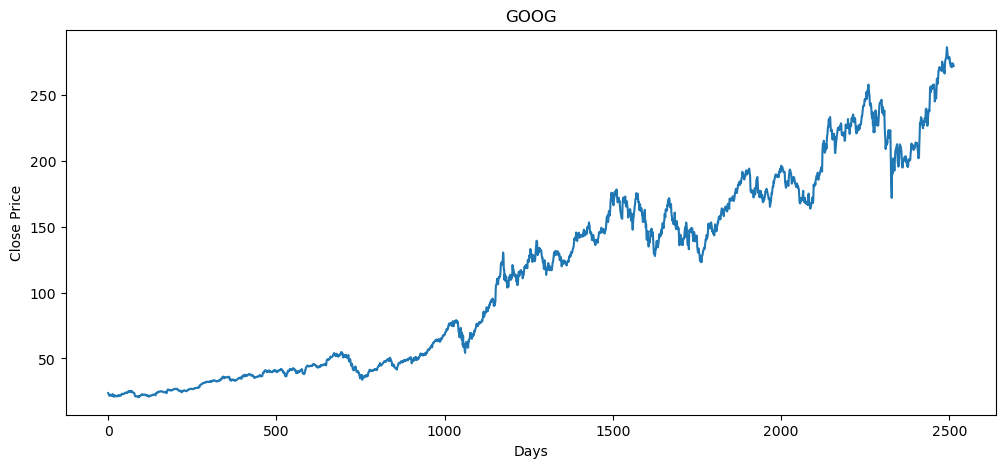

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title('GOOG')
plt.xlabel('Days')
plt.ylabel('Close Price');

# 3. Feature Engineering

In [10]:
df['MA_100'] = df.Close.rolling(100).mean()

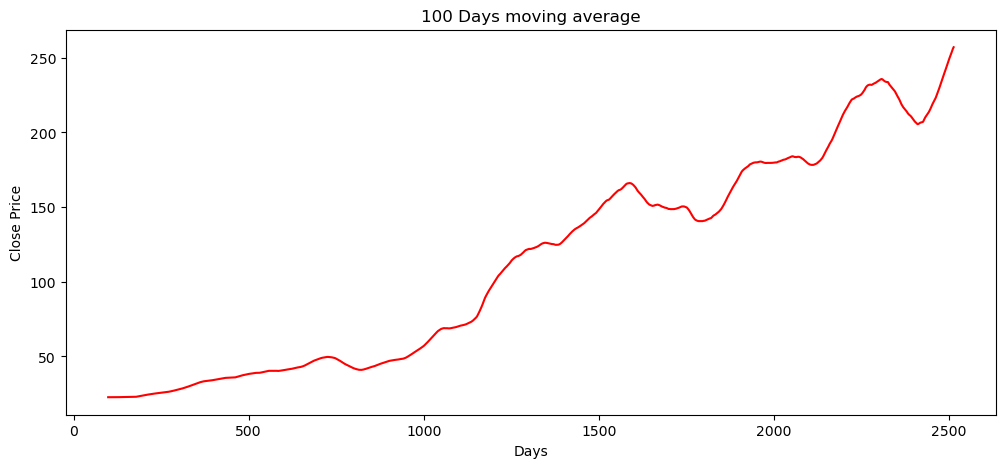

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df['MA_100'] ,'r')
plt.title('100 Days moving average')
plt.xlabel('Days')
plt.ylabel('Close Price');

In [12]:
df['MA_200'] = df.Close.rolling(200).mean()

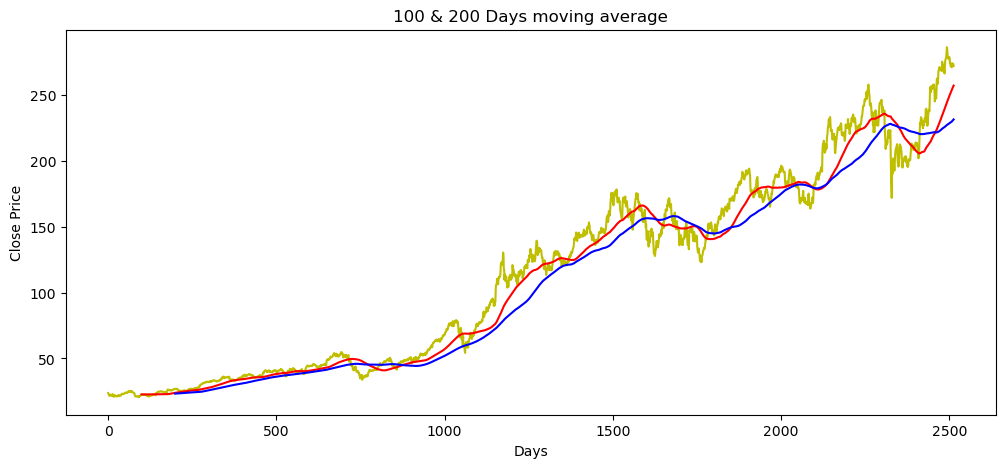

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.Close, 'y')
plt.plot(df['MA_100'] ,'r')
plt.plot(df['MA_200'] ,'b')
plt.title('100 & 200 Days moving average')
plt.xlabel('Days')
plt.ylabel('Close Price');

In [14]:
df.tail()

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
2509,2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600,254.758237,230.201515
2510,2025-12-26,273.399994,275.369995,272.859985,274.160004,21521800,255.467301,230.487312
2511,2025-12-29,273.760010,274.359985,272.350006,272.690002,23715200,256.076881,230.811285
2512,2025-12-30,273.079987,274.079987,272.279999,272.809998,22139600,256.612004,231.112873
2513,2025-12-31,271.859985,273.679993,271.750000,273.059998,27278500,257.041922,231.405819


## % Change

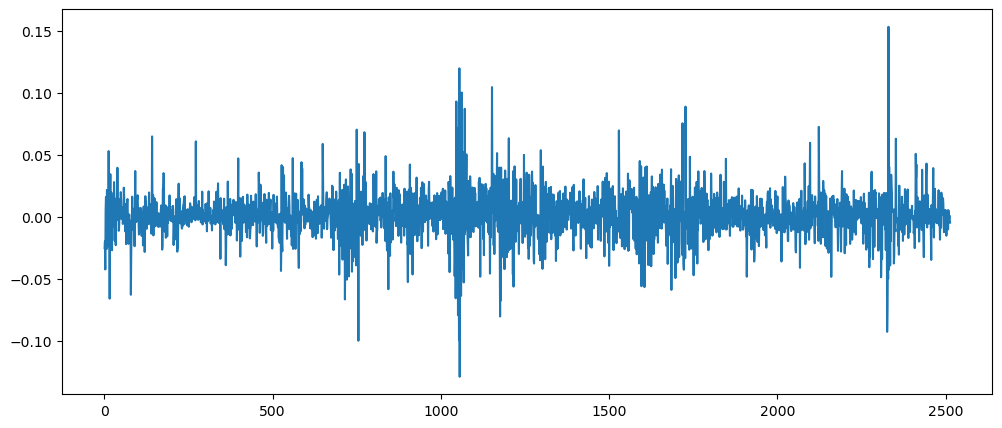

In [15]:
df['Percentage Change'] = df.Close.pct_change()
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Change']);

# 4. Data Preprocessing

In [16]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):len(df)])

## Scale down data

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)

# 5. Sequence Creation

In [18]:
x_train = []
y_train = []

In [19]:
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [20]:
x_train, y_train = np.array(x_train), np.array(y_train)

# 6. Model Building

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [22]:
model = Sequential()

## Adding Layers

In [23]:
model.add(Input(shape=(100,1)))
model.add(LSTM(units=128,activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


# 7. Model Training

In [25]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 7s 19ms/step - loss: 0.0131
Epoch 2/50
52/52 [==============================] - 1s 17ms/step - loss: 7.0808e-04
Epoch 3/50
52/52 [==============================] - 1s 17ms/step - loss: 6.9577e-04
Epoch 4/50
52/52 [==============================] - 1s 17ms/step - loss: 6.5064e-04
Epoch 5/50
52/52 [==============================] - 1s 17ms/step - loss: 5.9789e-04
Epoch 6/50
52/52 [==============================] - 1s 17ms/step - loss: 5.6179e-04
Epoch 7/50
52/52 [==============================] - 1s 17ms/step - loss: 5.6970e-04
Epoch 8/50
52/52 [==============================] - 1s 16ms/step - loss: 5.4437e-04
Epoch 9/50
52/52 [==============================] - 1s 17ms/step - loss: 5.0365e-04
Epoch 10/50
52/52 [==============================] - 1s 16ms/step - loss: 4.7355e-04
Epoch 11/50
52/52 [==============================] - 1s 19ms/step - loss: 5.5334e-04
Epoch 12/50
52/52 [==============================] - 1s 17ms/step - loss: 5.22

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [29]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [30]:
input_data = scaler.fit_transform(final_df)

In [31]:
x_test = []
y_test = []

In [32]:
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)

# 9. Making Predictions

In [34]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 15ms/step


## Inveersing the data into human redable

In [35]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

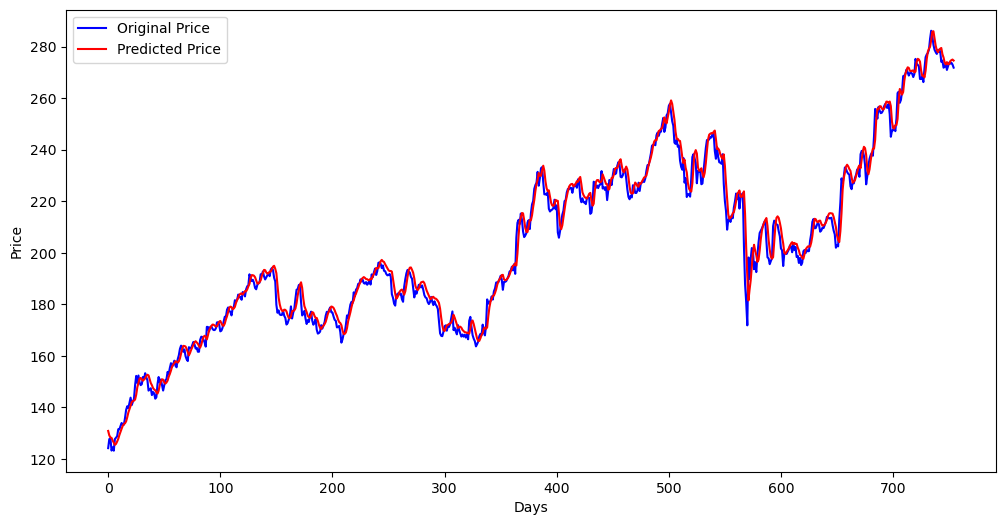

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend();

# 10. Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
mse = mean_squared_error(y_test, y_predicted)
mse

16.999567793726392

In [43]:
rmse = np.sqrt(mse)
rmse

4.123053212575165

### Calculating r2 score

In [44]:
r2 = r2_score(y_test, y_predicted)
r2

0.9858353831369778